# Zadanie: przestępczość
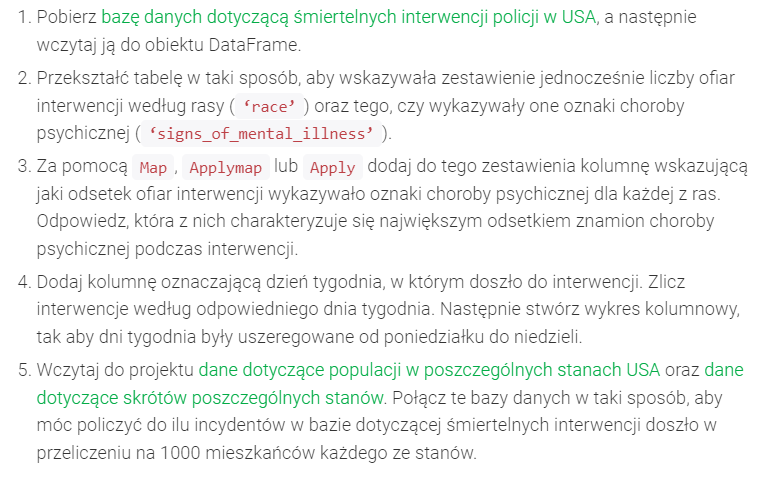

In [55]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### 2. Zestawienie liczby ofiar interwencji wg rasy oraz chorób psychicznych

In [18]:
df_pivot = df.pivot_table(index='race', columns='signs_of_mental_illness', aggfunc='size')
df_pivot.columns = ['No_m_illnes', 'M_illnes']
df_pivot

,No_m_illnes,M_illnes
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


### 3. Dodanie odsetka

In [19]:
def illnes_percent(row):
    return row['M_illnes'] / (row['No_m_illnes'] + row['M_illnes'])

In [23]:
df_pivot['illnes_rate'] = df_pivot.apply(lambda row: illnes_percent(row), axis=1).round(2)
df_pivot.sort_values(by='illnes_rate', ascending=False)

,No_m_illnes,M_illnes,illnes_rate
race,,,
W,1763,713,0.29
A,69,24,0.26
O,37,11,0.23
N,64,14,0.18
H,745,157,0.17
B,1114,184,0.14


Największym odsetkiem znamion choroby psychicznej podczas interwencji charaktyrezyją się osoby rasy białej.

### 4. Dni tygodnia interwencji

In [25]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [27]:
df.groupby('day').size()

day
Friday       761
Monday       726
Saturday     721
Sunday       753
Thursday     810
Tuesday      816
Wednesday    829
dtype: int64

In [53]:
days = df['day'].value_counts().reset_index()
days
sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days['day'] = pd.Categorical(days['day'], sorted_days)
days = days.sort_values('day')
days

,day,count
5,Monday,726
1,Tuesday,816
0,Wednesday,829
2,Thursday,810
3,Friday,761
6,Saturday,721
4,Sunday,753


Text(0.5, 1.0, 'Liczba incydentów w dane dni tygodnia')

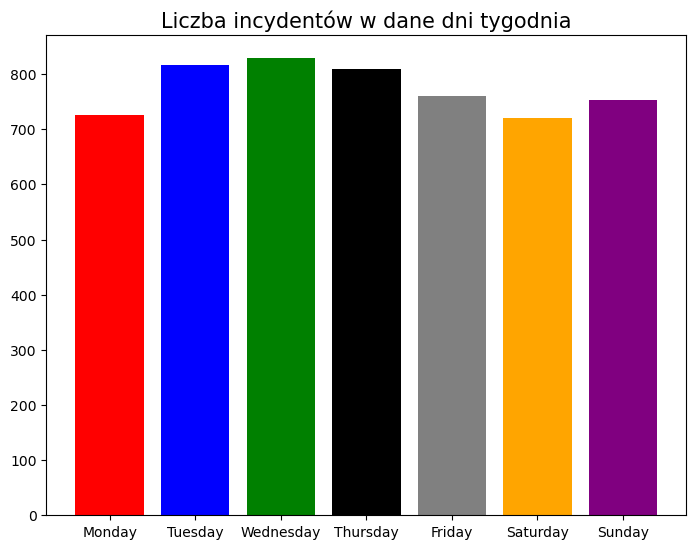

In [72]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
colors = ['red', 'blue', 'green', 'black', 'gray', 'orange', 'purple']
axes.bar(days['day'], days['count'], color = colors)
axes.xaxis.set_major_locator(plt.MaxNLocator(8))
axes.set_title('Liczba incydentów w dane dni tygodnia', size=15)

### 5. Połączenie baz danych

In [225]:
population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population')[0][["State", "Census population, April 1, 2020 [1][2]"]].iloc[:56,:]
population.head()

,State,"Census population, April 1, 2020 [1][2]"
0,California,38538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [223]:
states = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations')[0].iloc[10:,:]
state_names = states.iloc[:,0].reset_index()
state_names.columns = ['index', 'State']
abbr = states.iloc[:,3].reset_index().dropna()
abbr.columns = ['index', 'Abbreviation']
states_abbr = pd.merge(state_names, abbr, how='left', on='index').dropna()

In [224]:
merged = pd.merge(population, states_abbr, how='left', on='State').drop('index', axis=1)
merged.rename(columns={'State':'full name', 'Census population, April 1, 2020 [1][2]': 'population', 'Abbreviation':'state'}, inplace=True)
merged.head()

,full name,population,state
0,California,38538223,CA
1,Texas,30145505,TX
2,Florida,21538187,FL
3,New York,20201249,NY
4,Pennsylvania,13002700,PA


In [222]:
df_all = pd.merge(df, merged, how='left', on='state')
df_all.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day,full name,population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington,7705281
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,Oregon,4237256
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,Kansas,2937880
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,California,38538223
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,Colorado,5773714


In [226]:
incidents = df_all.groupby('full name').agg({'population':'first', 'id':'count'})
incidents.rename(columns={'id':'no_incidents'}, inplace=True)
incidents['inc_per_1000_residents'] = incidents['no_incidents'] / incidents['population'] * 1000
print('Tabela incydentów')
incidents

Tabela incydentów


,population,no_incidents,inc_per_1000_residents
full name,,,
Alabama,5024279,104,0.020699
Alaska,733391,39,0.053178
Arizona,7151502,254,0.035517
Arkansas,3011524,83,0.027561
California,38538223,799,0.020733
Colorado,5773714,195,0.033774
Connecticut,3605944,21,0.005824
Delaware,989948,13,0.013132
District of Columbia,689545,13,0.018853
